# The California Racial Justice Act & San Diego PD RIPA Data


## Abstract 

Approved in 2020, the California Racial Justice Act allows defendants to appeal for a retrial of their case or an adjustment of the charges or sentencing leveled at them if they can prove that there was racial bias at play. The bill doesn’t actually specify the kind of statistical proof a judge would require, though, so this project is a preliminary search to start to find out what kinds of aspects of criminal justice data might be useful to those invoking the CRJA. To that end, this project used pandas to analyze a dataset of San Diego Police Department stop data collected under RIPA, the Racial and Identity Profiling Act of 2015. 

## Table of Contents

1. ### [Introduction](#introduction)
2. ### [Methods](#methods)
3. ### [Results](#results)
4. ### [Discussion](#discussion)
5. ### [Sources + Adjacent Data](#sources)

## Introduction <a id='introduction'></a>

The California Racial Justice Act (AB-2542), approved by the governor in September 2020, is legislation that intends to combat racial bias and disparities in the criminal justice system by offering defendants a chance to contest their cases. The CRJA is usable on multiple levels — checking racial bias both in and out of courtrooms — as it addresses within-court instances of bias as well as racially charged disparities in sentencing, charges, and convictions. If the defendant invoking the CRJA can provide proof of discrimination occurring, a new trial will be set up for the case or the charges or sentence may be adjusted, depending on how far along the court case is. 

It’s key legislation in that it not only takes into account intentional bias directed at the defendant (by any other key figure in the courtroom processes) but also racially coded language or interactions. The aspect of the CRJA that this project specifically has focused on is racial disparities in charges. The evidence needed for proof of discrimination in court (when it comes to racial bias in charges) is differences due to race, national origin, or ethnicity in charges on a county-wide basis. 

I have an ongoing project to create a database of information that can be used for evidence of racial disparities at the different steps along the justice system: police stops, charges made, court outcomes, and sentencing

This is just a single dataset in that setup, using pandas to explore and analyze specifically traffic stop data collected by the San Diego Police Department as part of the Racial and Identity Profiling Act of 2015. 


## Methods <a id='methods'></a>

All data used can be found & downloaded [here](https://data.sandiego.gov/datasets/police-ripa-stops/) and on linked pages.

First, lets import and consolidate San Diego RIPA data into one massive df (result_df)

In [2]:
!pip install missingno

In [17]:
import pandas as pd   
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns

import datetime
from datetime import date
 

# somebody want to do some geospatial analysis or plotting?
# import geopandas as geopandas as gpd

# somebody want to get into doing Veil of Darkness testing?
# from astral import LocationInfo
# from astral.geocoder import database, lookup
# from astral.sun import sun
# city = lookup("San Diego", database())

# utility functions to convert data to type and handle missing values properly
def convert_dtype_float(x):
    if not x:
        return np.NaN
    try:
        return float(x)   
    except:        
        return np.NaN
    
def convert_dtype_stopcode(x):
    if not x:
        return -1
    try:
        return int(x)   
    except:        
        return -1    
    
def convert_dtype_string(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

update_dataset = False

if update_dataset:
    # Descriptions of the people stopped as perceived by the officer: disability/gender/race/ethnicity
    disability_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_disability_datasd.csv")
    gender_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_gender_datasd.csv", 
                            converters = {"gender": convert_dtype_string})
    race_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_race_datasd.csv")

    # Result of stop: warning, citation, arrest, search, etc
    stop_result_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_stop_result_datasd.csv")

    # Reason for stop: codes and text description [optional/dirty]
    stop_reason_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_stop_reason_datasd.csv", 
                                 converters = {"reason_for_stopcode": convert_dtype_stopcode})

    # Details: where the stop was made, who the officer was, etc.
    stop_details_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_stops_datasd.csv", 
                                  converters = {"land_mark": convert_dtype_string,
                                                'date_stop': convert_dtype_string}) 

    # Seizures: basis for seizure and what what was taken   
    prop_seize_basis_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_prop_seize_basis_datasd.csv", 
                                      converters = {"basisforpropertyseizure": convert_dtype_string})
    prop_seize_type_df = pd.read_csv("https://seshat.datasd.org/pd/ripa_prop_seize_type_datasd.csv", 
                                     converters = {"type_of_property_seized": convert_dtype_string})        

    # Search: there are additional datasets for whether/how/why stopped subjects were searched. 
    # loading, processing, and joining these are left as an exercise


    # put it all together
    result_df = pd.merge(disability_df, gender_df, how="outer", on=["stop_id","pid"])
    result_df = pd.merge(result_df, race_df, how="outer", on=["stop_id","pid"])
    result_df = pd.merge(result_df, stop_result_df, how="outer", on=["stop_id","pid"])
    result_df = pd.merge(result_df, stop_reason_df, how="outer", on=["stop_id","pid"])
    result_df = pd.merge(result_df, stop_details_df, how="outer", on=["stop_id","pid"])
    result_df = pd.merge(result_df, prop_seize_basis_df, how="outer", on=["stop_id","pid"])
    result_df = pd.merge(result_df, prop_seize_type_df, how="outer", on=["stop_id","pid"])
    
    result_df.to_csv('SD_RIPA_2023_04_28.csv')

else:
    pd.read_csv('https://drive.google.com/file/d/1HR5t4A5P_SzZWCsUNtYR7J_OUxeEAmaC/view?usp=sharing')

# make a consolidated datetime column
result_df['datetime_stop'] = pd.to_datetime(result_df['date_stop'] + ' ' + result_df['time_stop'], errors='coerce')
    

In [18]:
result_df.stop_id.describe()

count    809529.000000
mean     310879.352658
std      175770.873355
min        2443.000000
25%      160658.000000
50%      313038.000000
75%      461977.000000
max      613981.000000
Name: stop_id, dtype: float64

### PART 1: PRELIMINARY DATA BREAKDOWNS & ANALYSIS

In [2]:
#missingno package allows for visualization of missing data within result_df

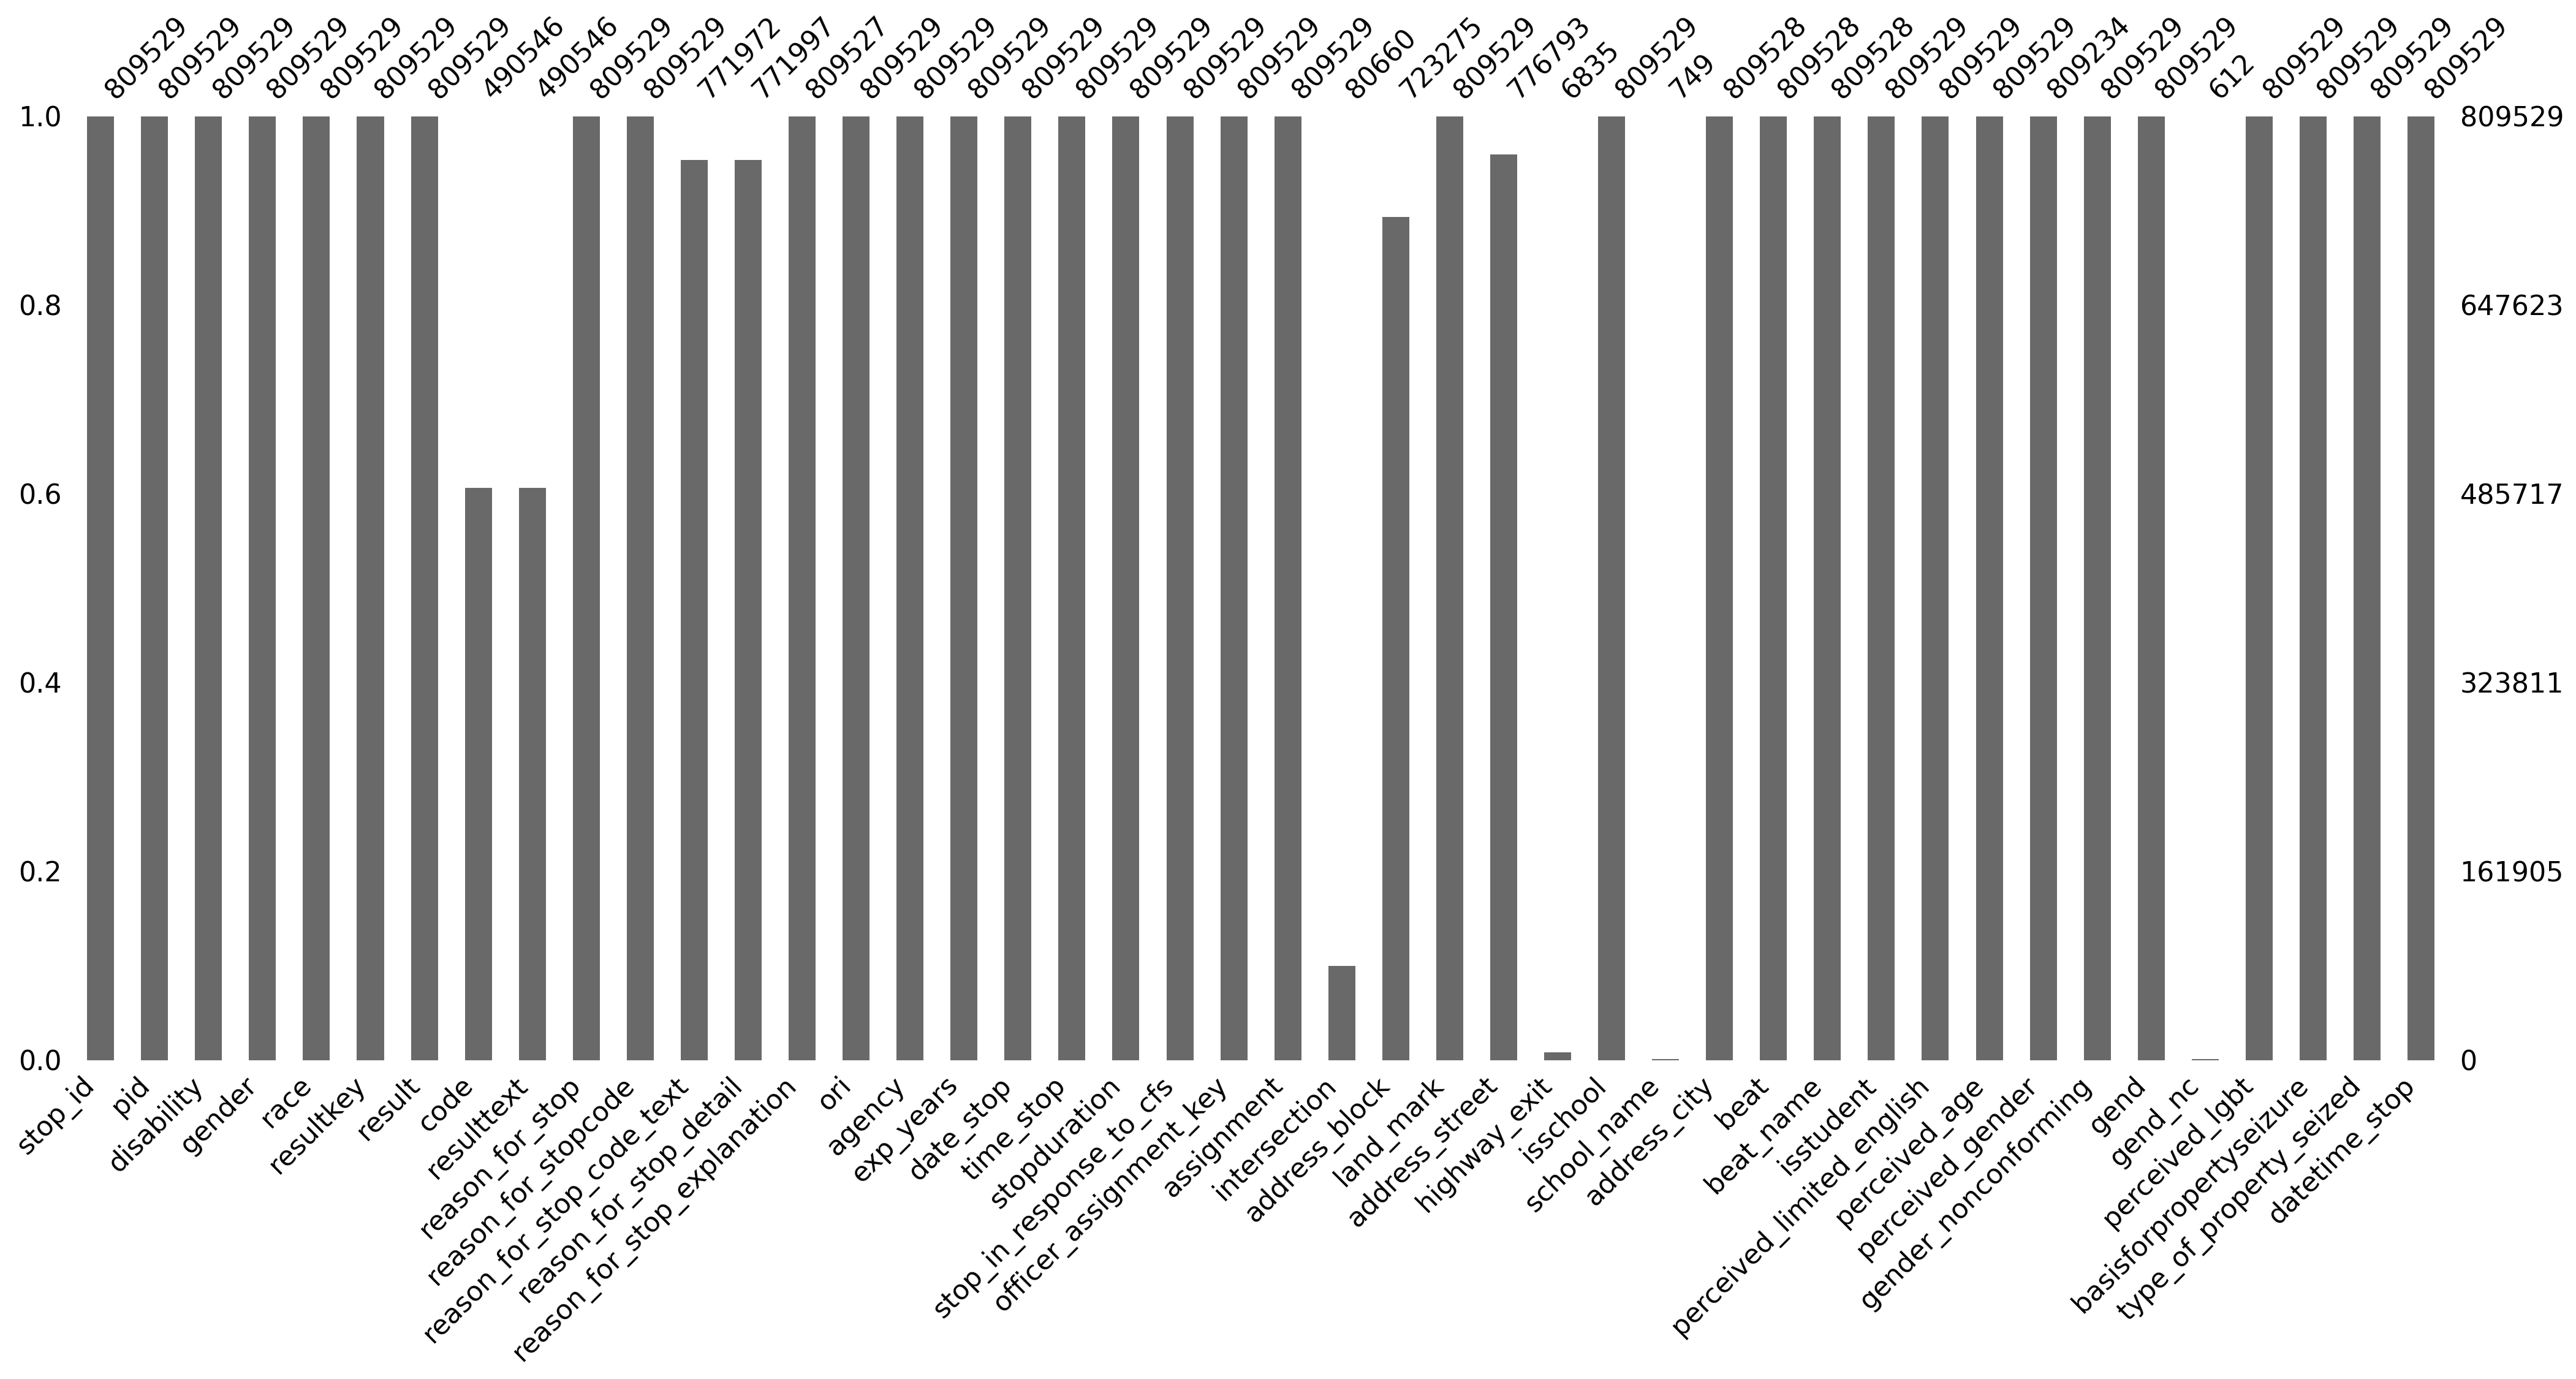

In [19]:
msno.bar(result_df);

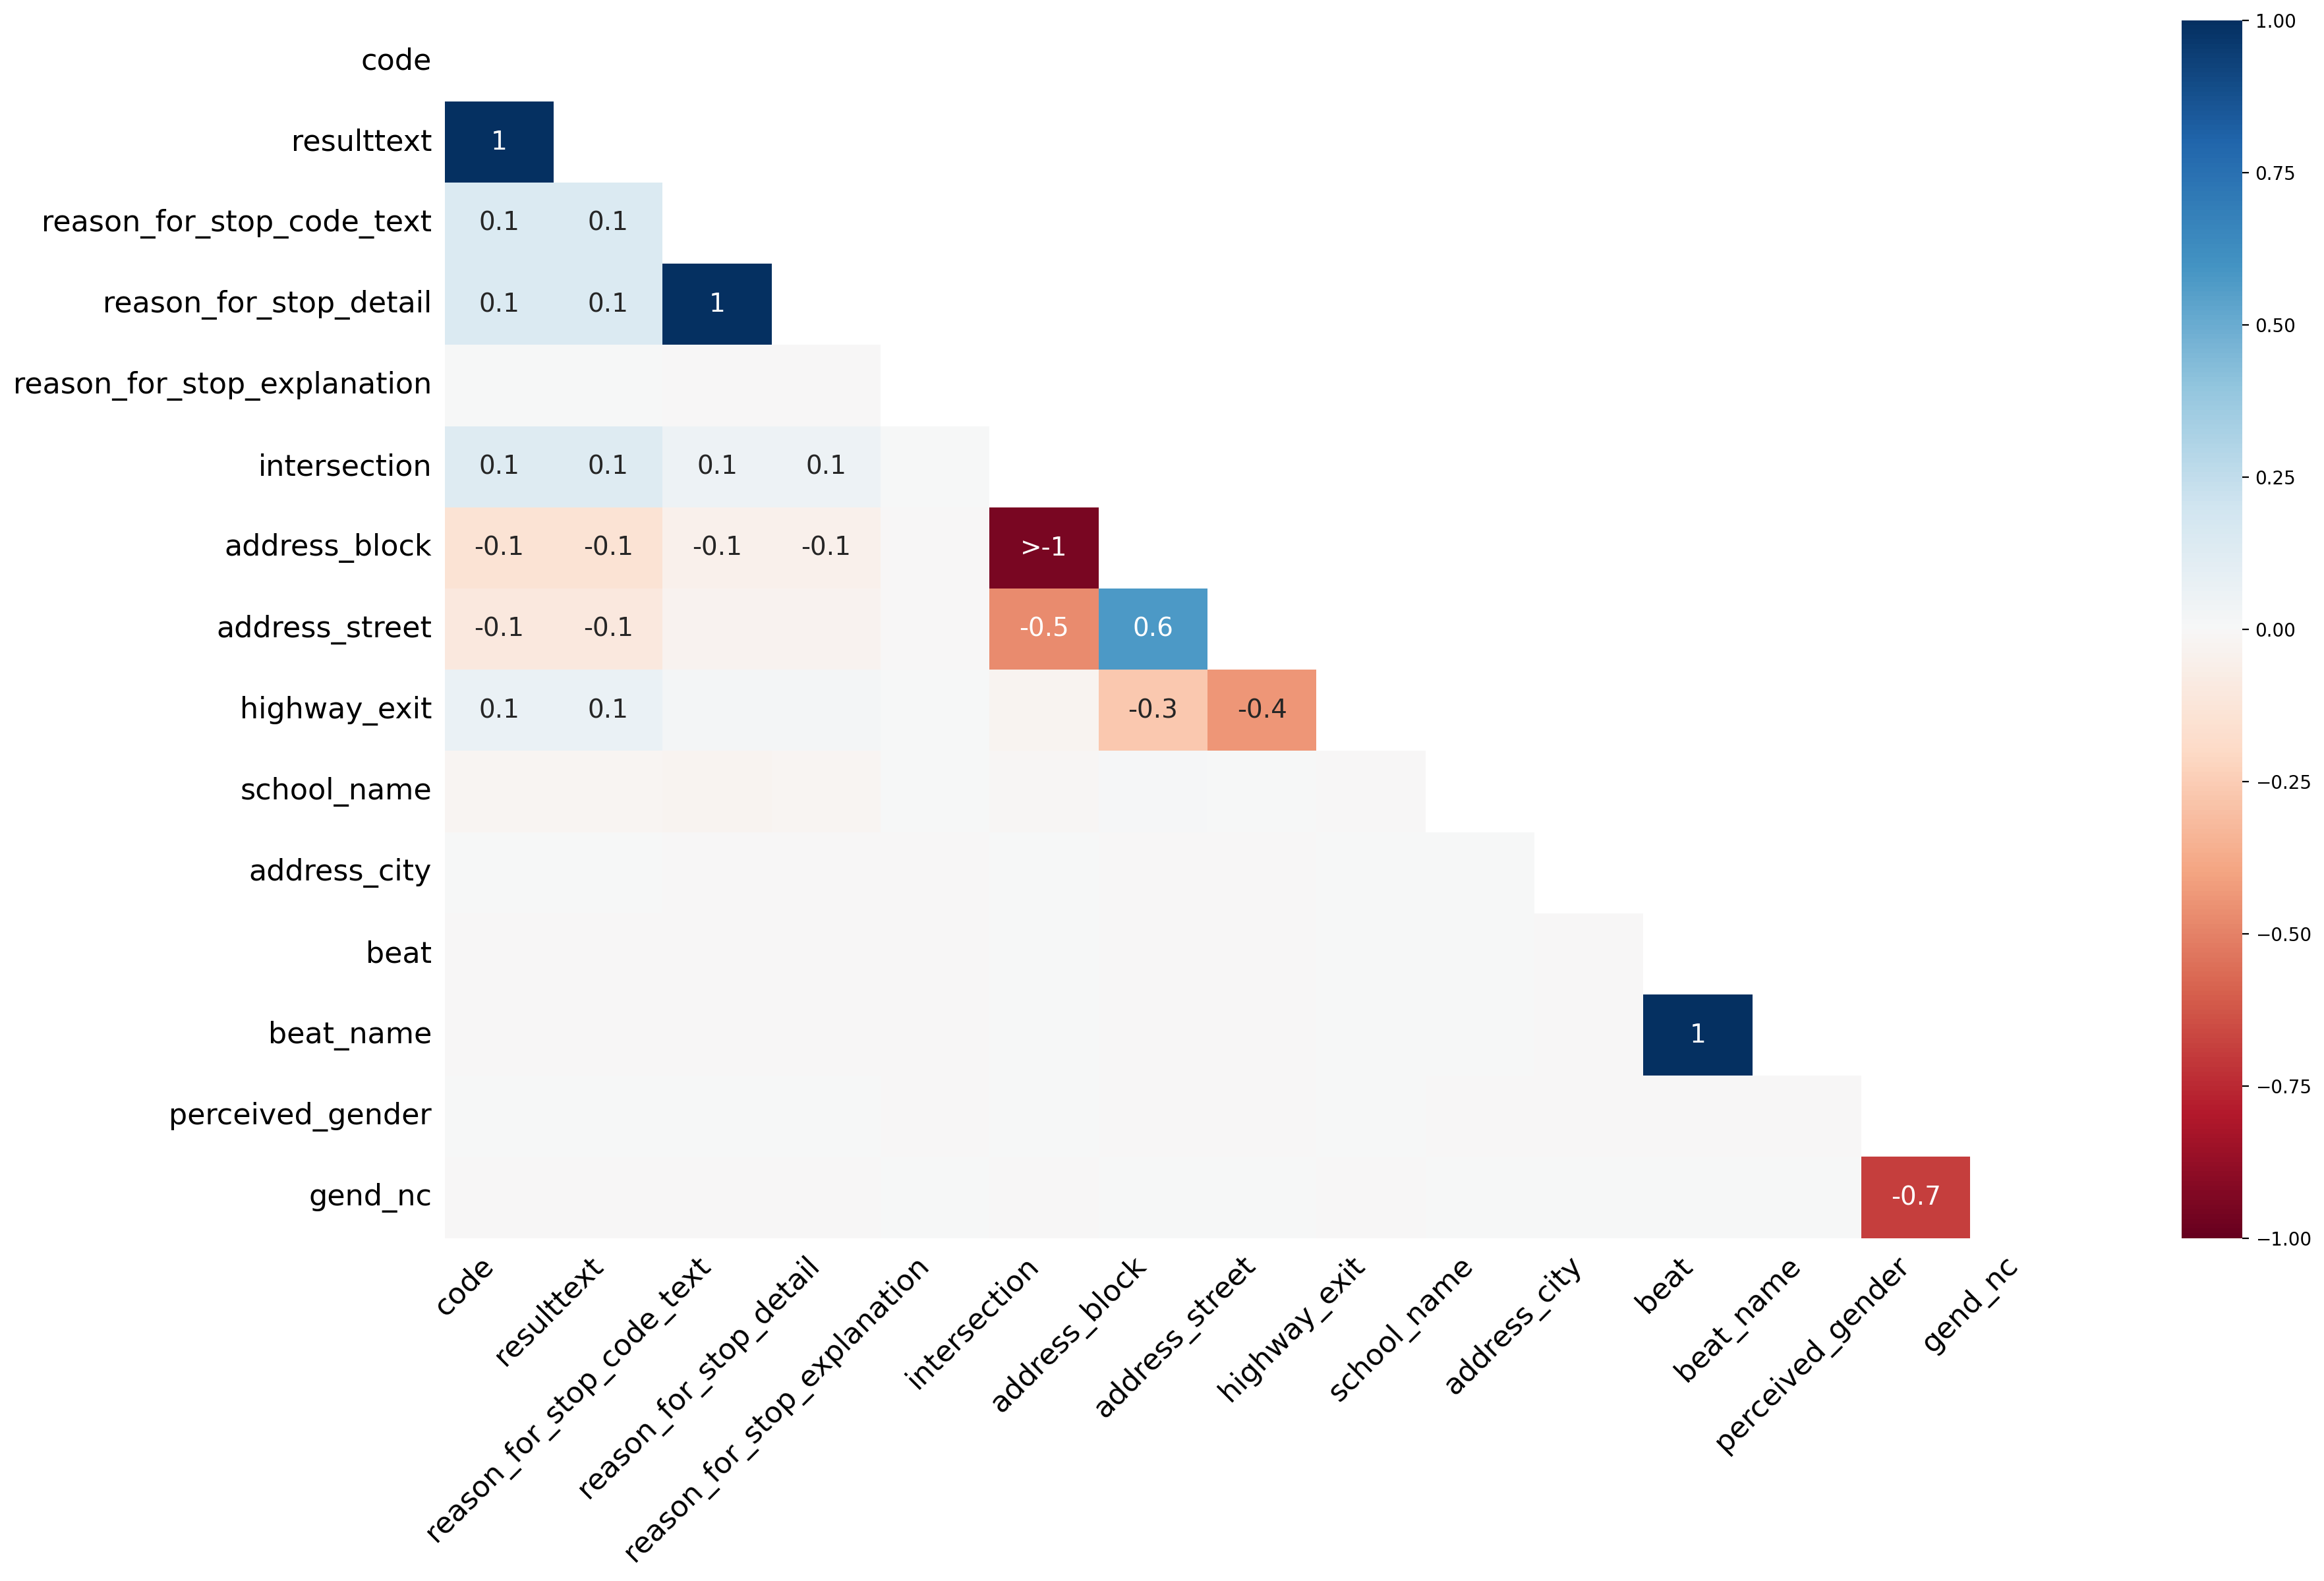

In [26]:
msno.heatmap( result_df);

In [27]:
# date range of the RIPA data
result_df['date_stop'].min(), result_df['date_stop'].max()

('2018-07-01', '2023-03-31')

In [28]:
stops = result_df.groupby('resulttext')['stop_id'].count().sort_values(ascending=False)
stops.name = 'how many'
stops = stops.to_frame()

In [29]:
stops.iloc[:50]

,how many
resulttext,
65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,44425
22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,25250
22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,21638
22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,15015
21461(A) VC - DRIVER FAIL OBEY SIGN/ETC (I) 54146,14625
4000(A)(1) VC - NO REG:VEH/TRAILER/ETC (I) 54657,12589
602 PC - TRESPASSING (M) 32022,11720
25620 BP - POSS OPEN ALCOHOL:PUBLIC (I) 41063,10920
23123.5 VC - NO HND HLD DEVICE W/DRIVE (I) 54655,10895


In [32]:
stops.shape

(1791, 1)

In [40]:
those = result_df.query('code in [65002,65000]')

keywords = '54.0110|encroach|incroach|encroch|incroch'

these = those['reason_for_stop_explanation'].str.lower().str.contains(keywords)

print('Specifically labelled encroachment OR 54.0110 for both infraction and misdemeanor:\n',
      '{} stops covering {} persons'.format( 
          those.loc[these,'stop_id'].unique().shape[0], 
          those.loc[these].shape[0] ) 
     )


encroach = those.loc[these]
encroach.date_stop = pd.to_datetime( encroach.date_stop )
encroach['year'] = encroach.date_stop.dt.year.astype(str)
encroach['year-month']=encroach.date_stop.dt.strftime("%Y-%m")
encroach['type'] = encroach.code.apply( lambda x: 'infraction' if x == 65002 else 'misdemeanor')
trans = {'Citation for infraction':'citation', 'In-field cite and release':'citation', 'Custodial Arrest without warrant':'arrested', 'Warning (verbal or written)':'warning'}
encroach['action']=encroach['result'].apply( lambda x: trans[x])



Specifically labelled encroachment OR 54.0110 for both infraction and misdemeanor:
 4443 stops covering 6118 persons


/var/folders/lc/h592vhs5421_z0kmg2tljk_40000gn/T/ipykernel_30920/510324141.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encroach.date_stop = pd.to_datetime( encroach.date_stop )
/var/folders/lc/h592vhs5421_z0kmg2tljk_40000gn/T/ipykernel_30920/510324141.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encroach['year'] = encroach.date_stop.dt.year.astype(str)
/var/folders/lc/h592vhs5421_z0kmg2tljk_40000gn/T/ipykernel_30920/510324141.py:17: SettingWithCopyWarning: 
A value is trying to be set on a 

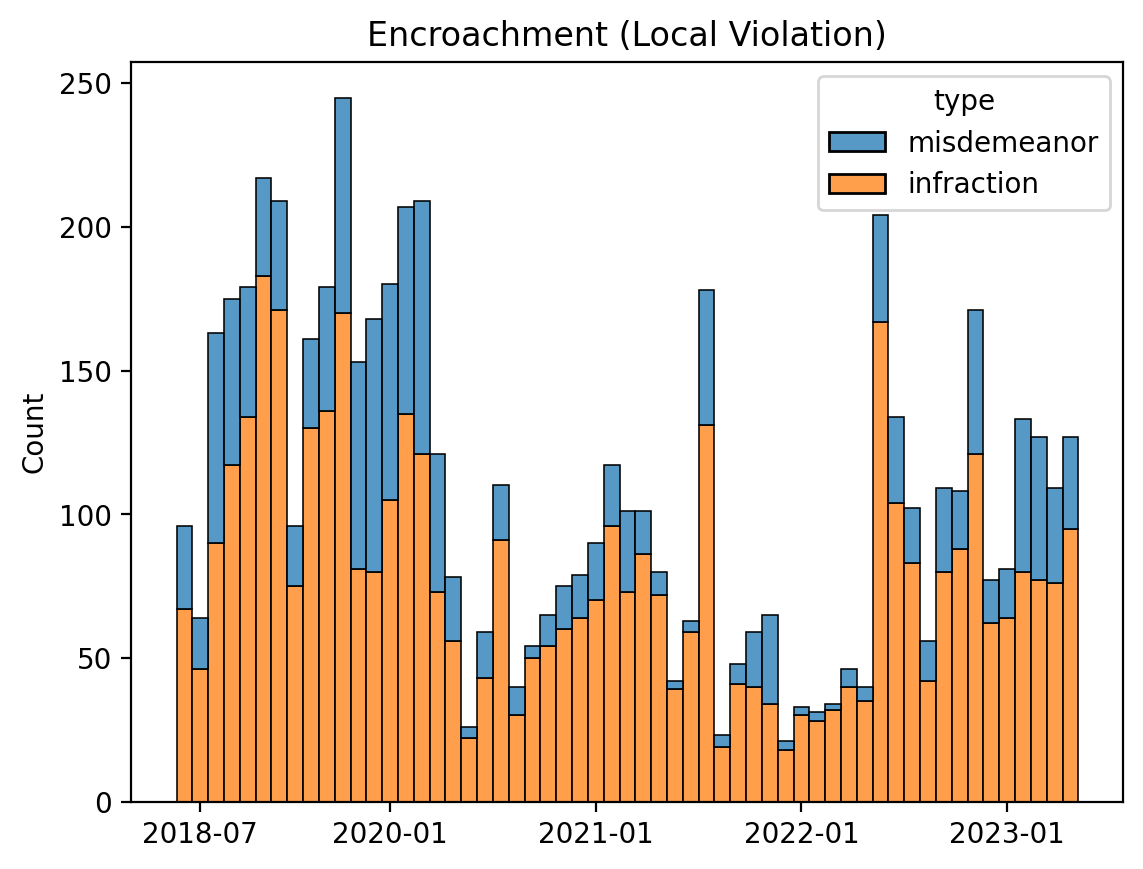

In [39]:

g  = sns.histplot(data=encroach, x='year-month', hue='type', multiple='stack',hue_order=('misdemeanor','infraction'))#, stat='density', multiple='dodge', common_norm=False);
ticks = g.get_xticks()
#labels = g.get_xticklabels()
ticks=[1,13,26,39,52]
g.set_xticks(ticks)
g.set_xlabel('');
g.set_title('Encroachment (Local Violation)');

In [41]:

( encroach.groupby('type')['stop_id']
     .count()
     .rename('total')
     .to_frame()
     .join(
         encroach.groupby(['type','action'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
         .unstack()
         .apply(lambda x: (100*x/x.sum()).astype(int) , axis=1)
     ) 
)

/var/folders/lc/h592vhs5421_z0kmg2tljk_40000gn/T/ipykernel_30920/3158148337.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  ( encroach.groupby('type')['stop_id']


,total,"(percent, arrested)","(percent, citation)","(percent, warning)"
type,,,,
infraction,4466,2,65,31
misdemeanor,1652,31,44,23


In [42]:
res = ( encroach.groupby(['race'])['stop_id']
         .count()
         .rename('percent')
         .to_frame()
      )
res = res / res.sum() * 100
res.astype(int)

,percent
race,
Asian,1
Black/African American,27
Hispanic/Latino/a,17
Middle Eastern or South Asian,0
Native American,0
Pacific Islander,0
White,51


Encroachments are less Hispanic and more Black and White than expected from city census of races

In [43]:

speeding = result_df.query('resulttext == "22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303"')

In [46]:
speeding.columns

Index(['stop_id', 'pid', 'disability', 'gender', 'race', 'resultkey', 'result',
       'code', 'resulttext', 'reason_for_stop', 'reason_for_stopcode',
       'reason_for_stop_code_text', 'reason_for_stop_detail',
       'reason_for_stop_explanation', 'ori', 'agency', 'exp_years',
       'date_stop', 'time_stop', 'stopduration', 'stop_in_response_to_cfs',
       'officer_assignment_key', 'assignment', 'intersection', 'address_block',
       'land_mark', 'address_street', 'highway_exit', 'isschool',
       'school_name', 'address_city', 'beat', 'beat_name', 'isstudent',
       'perceived_limited_english', 'perceived_age', 'perceived_gender',
       'gender_nonconforming', 'gend', 'gend_nc', 'perceived_lgbt',
       'basisforpropertyseizure', 'type_of_property_seized', 'datetime_stop'],
      dtype='object')

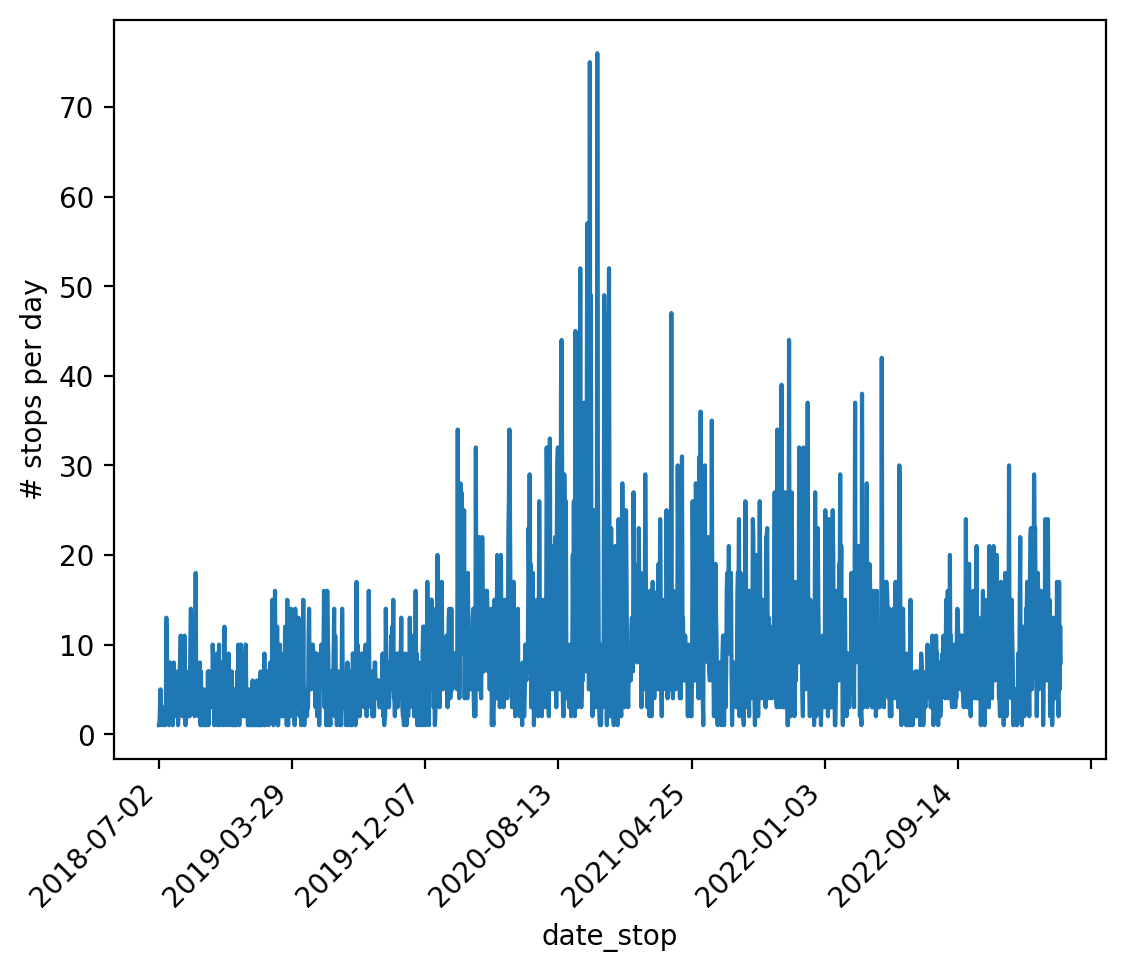

In [50]:
speeding.groupby('date_stop')['stop_id'].count().plot()
plt.ylabel('# stops per day')
plt.xticks(rotation=45, ha='right');

<Axes: >

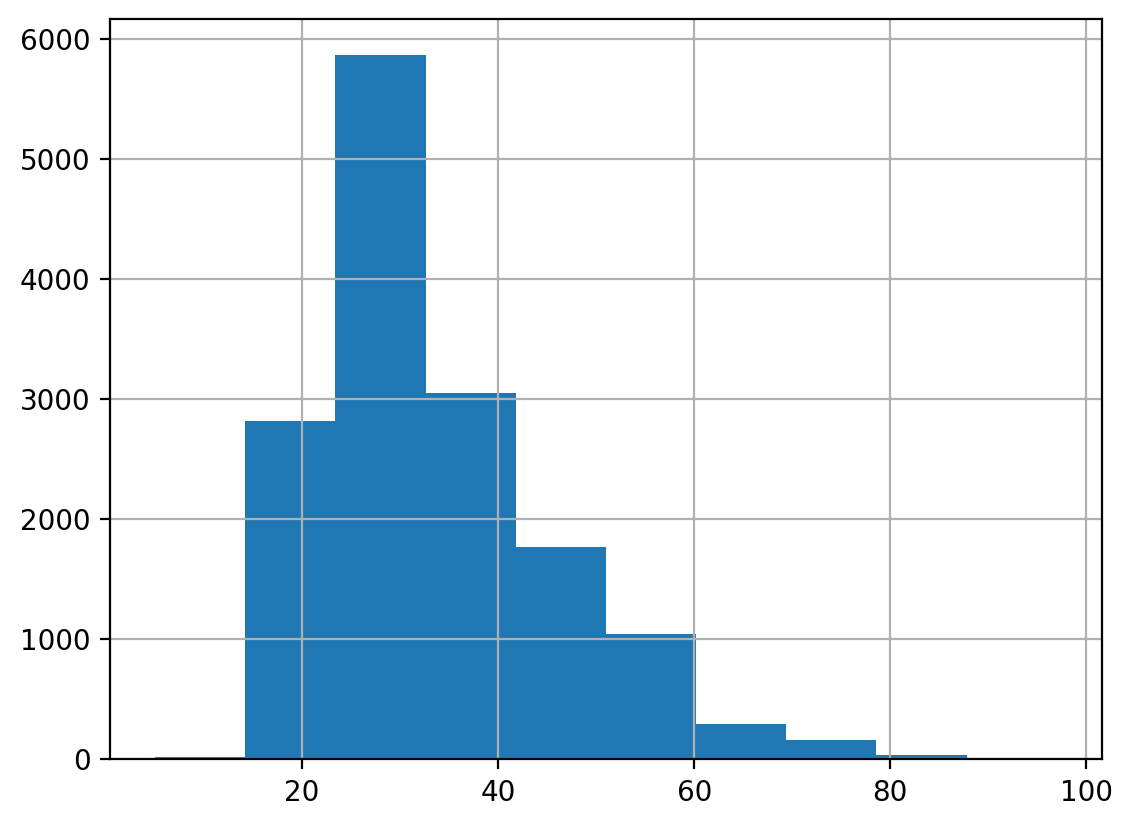

In [51]:
speeding.perceived_age.hist()

<Axes: >

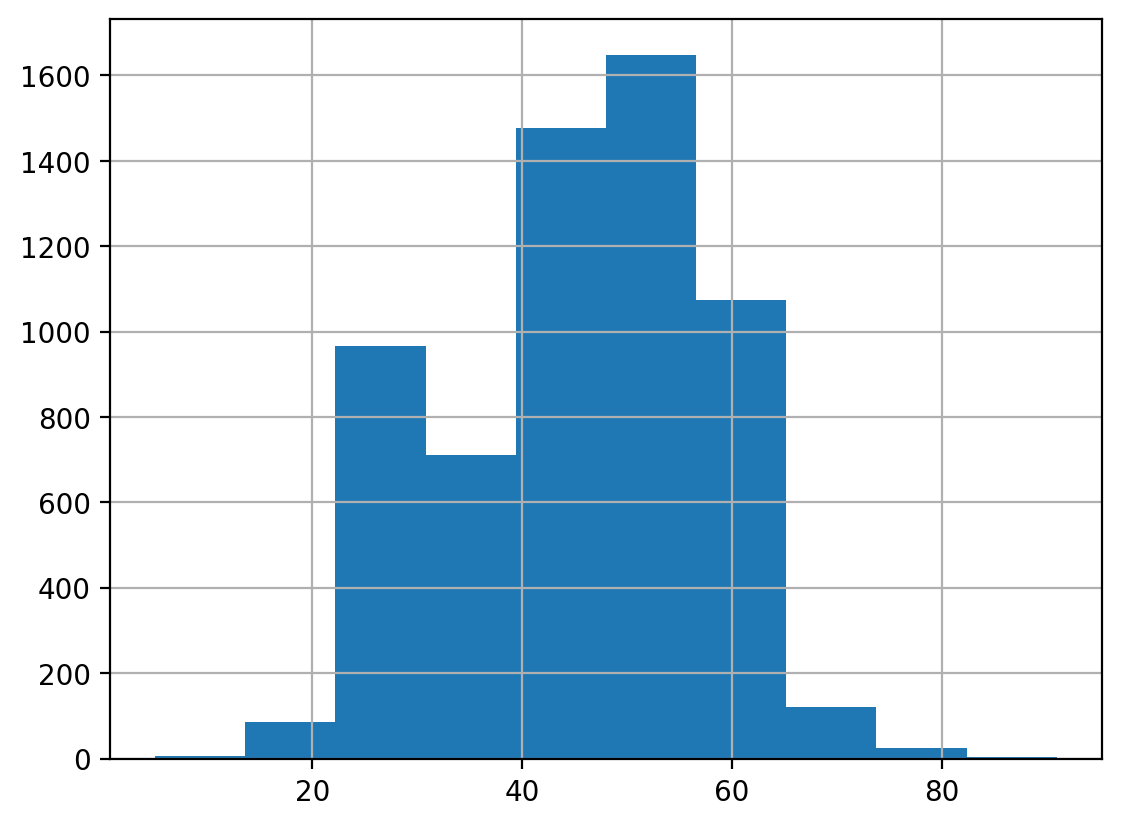

In [52]:
encroach.perceived_age.hist()

In [53]:
speeding['offence'] = 'speeding'
encroach['offence'] = 'encroachment'
both = pd.concat([speeding, encroach])

/var/folders/lc/h592vhs5421_z0kmg2tljk_40000gn/T/ipykernel_30920/2383840329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeding['offence'] = 'speeding'
/var/folders/lc/h592vhs5421_z0kmg2tljk_40000gn/T/ipykernel_30920/2383840329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encroach['offence'] = 'encroachment'


In [54]:
both.shape

(21133, 49)

<Axes: xlabel='perceived_age', ylabel='Percent'>

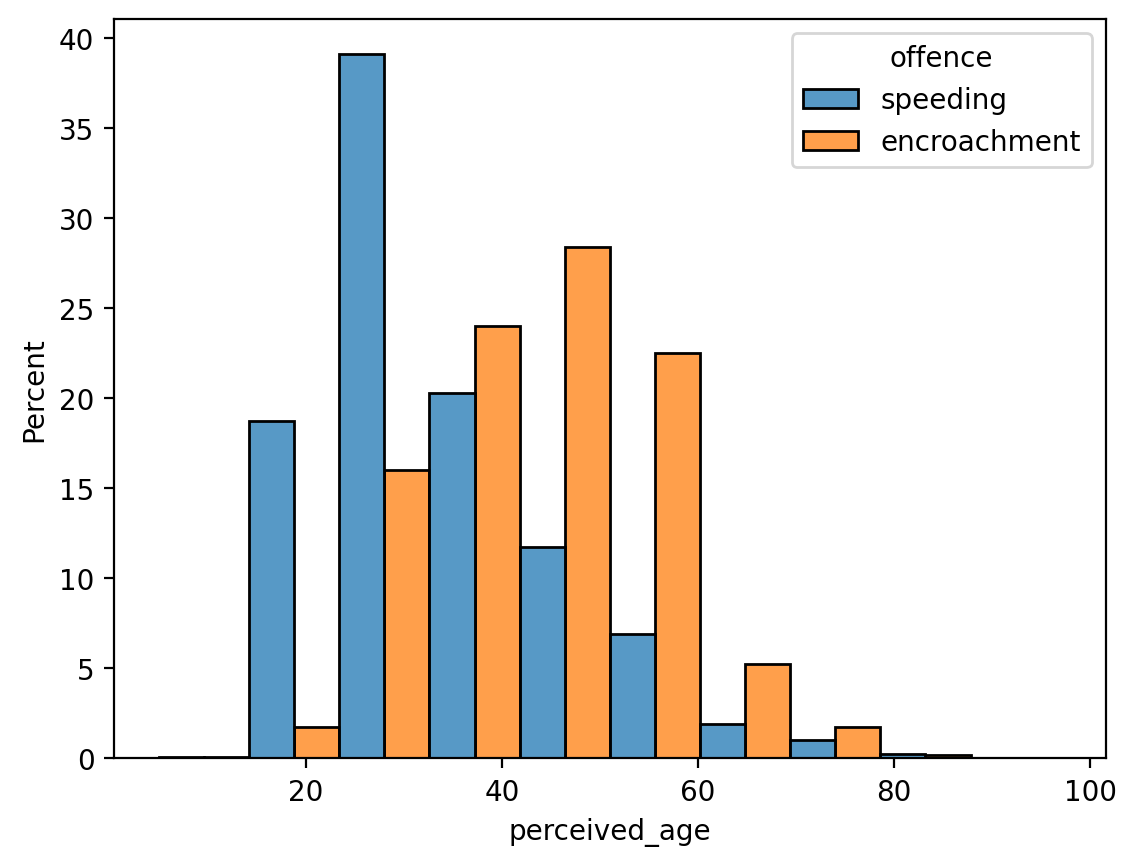

In [64]:
sns.histplot(x='perceived_age',
             hue='offence',
             multiple="dodge",
             bins=10,
             stat='percent',
             common_norm = False,
             data=both)